# GraphSSL Downstream Evaluation Demonstration

This notebook demonstrates the downstream evaluation pipeline for GraphSSL.

**Process:**
1. Train encoder with supervised node classification (skip downstream)
2. Extract embeddings from trained model
3. Evaluate on three downstream tasks:
   - Node property prediction (venue classification)
   - Binary link prediction (citation links)
   - Multi-label link prediction (field_of_study tags)

**Estimated Runtime**: ~10 hours on RTX 3060 (100 epochs training + downstream evaluation)

THE CURRENT PLOTS ARE FOR A TINY TEST RUN!

## Setup

In [2]:
%pip install -e ..

Note: you may need to restart the kernel to use updated packages.


c:\Users\gabri\GTFO_Onedrive\DTU_Code\GraphSSL\.venv\Scripts\python.exe: No module named pip


In [3]:
import sys
import os
from pathlib import Path
from datetime import datetime
import torch
import matplotlib.pyplot as plt
import numpy as np
import argparse
import torch_geometric.transforms as T

os.environ["WANDB_MODE"] = "disabled"
project_root = Path.cwd().parent if Path.cwd().name == 'scripts' else Path.cwd()
sys.path.insert(0, str(project_root / 'src'))

from graphssl.main import run_pipeline
from graphssl.utils.downstream import (
    evaluate_node_property_prediction,
    evaluate_link_prediction,
    evaluate_link_prediction_multiclass
)
from graphssl.utils.data_utils import load_ogb_mag
import wandb
wandb.init(mode="disabled")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

Device: cuda
GPU: NVIDIA GeForce RTX 3060


## Configuration

In [ ]:
CONFIG = {
    "data_root": str(project_root / "data"),
    "results_root": str(project_root / "results" / f"downstream_demo_{datetime.now().strftime('%Y%m%d_%H%M%S')}"),
    "objective_type": "supervised_node_classification",
    "target_node": "paper",
    "target_edge_type": "paper,has_topic,field_of_study",
    "use_feature_decoder": True,
    "use_edge_decoder": True,
    "hidden_channels": 128,
    "num_layers": 2,
    "num_neighbors": [30, 30],
    "batch_size": 1024,
    "epochs": 10,
    "lr": 0.001,
    "dropout": 0.5,
    "patience": 5,
    "num_workers": 0,  # Set to 0 for Windows/Jupyter compatibility (multiprocessing issues)
    "weight_decay": 0,
    "log_interval": 10,
    "seed": 42,
    "edge_msg_pass_prop": [0, 0, 0],
    "extract_embeddings": True,
    "downstream_eval": False,
    "downstream_task": "both",
    "downstream_n_runs": 5,
    "downstream_hidden_dim": 128,
    "downstream_num_layers": 2,
    "downstream_dropout": 0.5,
    "multiclass_batch_size": 256,
    "downstream_node_epochs": 10,
    "downstream_link_epochs": 1,
    "downstream_patience": 4,
    "downstream_lr": 0.0001,
    "model_path": None,
    "preprocess": "metapath2vec",
    "metapath2vec_embeddings_path": "embedding.pt",
    "loss_fn": "mse",
    "mer_weight": 1.0,
    "tar_weight": 1.0,
    "pfp_weight": 1.0,
    "tar_temperature": 0.5,
    "mask_ratio": 0.5,
    "neg_sampling_ratio": 1.0,
    "aggr": "mean",
    "aggr_rel": "sum",
    "use_batchnorm": True,
    "node_inductive": True,
    "dependent_node_edge_data_split": True,
    "lambda_tar": 1.0,
    "lambda_pfp": 0.0,
    "disable_tqdm": False,
    "log_level": "INFO",
    "test_mode": True,    # CURRENTLY RUNNING A TINY TEST!!! CHANGE THIS FOR REAL RUNS
    "test_max_nodes": 5000,
}

print(f"Training configuration:")
print(f"  Objective: {CONFIG['objective_type']}")
print(f"  Epochs: {CONFIG['epochs']}")
print(f"  Results: {CONFIG['results_root']}")

Training configuration:
  Objective: supervised_node_classification
  Epochs: 10
  Results: c:\Users\gabri\GTFO_Onedrive\DTU_Code\GraphSSL\results\downstream_demo_20251216_105243


## Step 1: Train Encoder (Skip Downstream)

In [5]:
args = argparse.Namespace(**CONFIG)
run_pipeline(args)

GraphSSL - Supervised Learning Pipeline
Task: Venue Prediction on OGB_MAG Dataset

Using device: cuda
GPU: NVIDIA GeForce RTX 3060
CUDA Version: 12.6

Step 1: Loading Dataset

Step 2: Creating Data Loaders

Step 3: Creating Training Objective

Step 4: Creating Model

Step 5: Setting up Optimizer

Step 6: Training Model


Epoch   1/10 | Train Loss: 5.9479 | Train Acc: 0.0056 | Val Loss: 5.8363 | Val Acc: 0.0158 | Time: 0.81s


Epoch   2/10 | Train Loss: 5.7226 | Train Acc: 0.0176 | Val Loss: 5.7921 | Val Acc: 0.0204 | Time: 0.14s


Epoch   3/10 | Train Loss: 5.5828 | Train Acc: 0.0286 | Val Loss: 5.7278 | Val Acc: 0.0226 | Time: 0.14s


Epoch   4/10 | Train Loss: 5.4386 | Train Acc: 0.0369 | Val Loss: 5.6394 | Val Acc: 0.0249 | Time: 0.14s


Epoch   5/10 | Train Loss: 5.3144 | Train Acc: 0.0456 | Val Loss: 5.5285 | Val Acc: 0.0362 | Time: 0.16s


Epoch   6/10 | Train Loss: 5.2152 | Train Acc: 0.0510 | Val Loss: 5.3956 | Val Acc: 0.0679 | Time: 0.14s


Epoch   7/10 | Train Loss: 5.1215 | Train Acc: 0.0639 | Val Loss: 5.2562 | Val Acc: 0.0769 | Time: 0.14s


Epoch   8/10 | Train Loss: 5.0316 | Train Acc: 0.0770 | Val Loss: 5.1302 | Val Acc: 0.0769 | Time: 0.14s


Epoch   9/10 | Train Loss: 4.9677 | Train Acc: 0.0831 | Val Loss: 5.0303 | Val Acc: 0.0814 | Time: 0.14s


Epoch  10/10 | Train Loss: 4.9396 | Train Acc: 0.0803 | Val Loss: 4.9514 | Val Acc: 0.0769 | Time: 0.14s

Step 7: Testing Model



Step 8: Saving Results

Step 9: Extracting Embeddings



Pipeline Completed Successfully!

Final Test Results:
  Test Loss: 4.8057
  Test Acc: 0.1003

All outputs saved to: c:\Users\gabri\GTFO_Onedrive\DTU_Code\GraphSSL\results\downstream_demo_20251216_105243


## Training Results

Final Train Loss: 4.9396
Final Val Loss: 4.9514
Best Val Accuracy: 0.0814


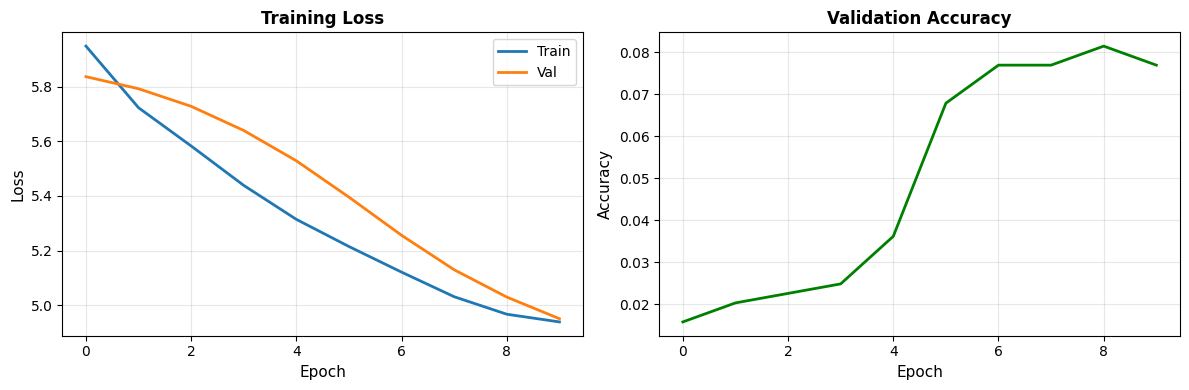

In [6]:
results_dir = Path(CONFIG['results_root'])
history = torch.load(results_dir / "training_history.pt", weights_only=False)

if 'train_loss' in history:
    print(f"Final Train Loss: {history['train_loss'][-1]:.4f}")
    print(f"Final Val Loss: {history['val_loss'][-1]:.4f}")
if 'val_acc' in history:
    print(f"Best Val Accuracy: {max(history['val_acc']):.4f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
if 'train_loss' in history:
    axes[0].plot(history['train_loss'], label='Train', linewidth=2)
    axes[0].plot(history['val_loss'], label='Val', linewidth=2)
    axes[0].set_xlabel('Epoch', fontsize=11)
    axes[0].set_ylabel('Loss', fontsize=11)
    axes[0].set_title('Training Loss', fontsize=12, fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
if 'val_acc' in history:
    axes[1].plot(history['val_acc'], linewidth=2, color='green')
    axes[1].set_xlabel('Epoch', fontsize=11)
    axes[1].set_ylabel('Accuracy', fontsize=11)
    axes[1].set_title('Validation Accuracy', fontsize=12, fontweight='bold')
    axes[1].grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Step 2: Load Embeddings and Data

In [7]:
from graphssl.utils.data_utils import create_edge_splits
embeddings_data = torch.load(results_dir / "embeddings.pt", weights_only=False)
data = load_ogb_mag(CONFIG['data_root'], preprocess=CONFIG['preprocess'])
target_edge_type = tuple(CONFIG['target_edge_type'].split(','))
train_data, val_data, test_data, train_edge_index, val_edge_index, test_edge_index = create_edge_splits(
    data=data,
    target_edge_type=target_edge_type,
    node_inductive=CONFIG['node_inductive'],
    dependent=CONFIG['dependent_node_edge_data_split']
)
data = T.ToUndirected(merge=True)(data)

train_embeddings = embeddings_data['train_embeddings']
train_labels = embeddings_data['train_labels']
val_embeddings = embeddings_data['val_embeddings']
val_labels = embeddings_data['val_labels']
test_embeddings = embeddings_data['test_embeddings']
test_labels = embeddings_data['test_labels']

print("Loaded embeddings and data:")
print(f"  Train embeddings: {train_embeddings.shape}, labels: {train_labels.shape}")
print(f"  Val embeddings: {val_embeddings.shape}, labels: {val_labels.shape}")
print(f"  Test embeddings: {test_embeddings.shape}, labels: {test_labels.shape}")

Loaded embeddings and data:
  Train embeddings: torch.Size([4259, 128]), labels: torch.Size([4259])
  Val embeddings: torch.Size([442, 128]), labels: torch.Size([442])
  Test embeddings: torch.Size([299, 128]), labels: torch.Size([299])


## Step 3: Downstream Task 1 - Node Property Prediction

Predict venue (field of study) from paper embeddings using frozen representations.

In [8]:
wandb.init(mode="disabled")
num_classes = train_labels.max().item() + 1

node_results = evaluate_node_property_prediction(
    train_embeddings=train_embeddings,
    train_labels=train_labels,
    val_embeddings=val_embeddings,
    val_labels=val_labels,
    test_embeddings=test_embeddings,
    test_labels=test_labels,
    num_classes=num_classes,
    device=device,
    n_runs=3,
    hidden_dim=128,
    num_layers=2,
    dropout=0.5,
    batch_size=1024,
    lr=0.001,
    weight_decay=0.0,
    num_epochs=50,
    early_stopping_patience=10,
    verbose=True,
    disable_tqdm=False
)

print("\nNode Classification Results:")
print(f"  Test Accuracy: {node_results['test_acc_mean']:.4f} ± {node_results['test_acc_std']:.4f}")
print(f"  Test Loss: {node_results['test_loss_mean']:.4f} ± {node_results['test_loss_std']:.4f}")


Node Classification Results:
  Test Accuracy: 0.1839 ± 0.0055
  Test Loss: 3.7387 ± 0.0204


## Step 4: Downstream Task 2 - Binary Link Prediction

Predict existence of links betwen papers and fields of study.

In [9]:
# This cell keeps hitching in a jupyter notebook VScode on my computer, perhaps because of memory issues.

from graphssl.utils.graphsage import create_model

# Load model checkpoint
checkpoint = torch.load(results_dir / f"model_{CONFIG['objective_type']}.pt", weights_only=False)

# Recreate model using saved args
saved_args = checkpoint['args']
model = create_model(
    data=data,
    hidden_channels=saved_args['hidden_channels'],
    num_layers=saved_args['num_layers'],
    dropout=saved_args['dropout'],
    aggr=saved_args['aggr'],
    aggr_rel=saved_args['aggr_rel'],
    use_batchnorm=saved_args['use_batchnorm']
)

# Load model weights
model.load_state_dict(checkpoint['model_state_dict'])
model = model.to(device)
model.eval()

link_results = evaluate_link_prediction(
    model=model,
    train_data=train_data,
    val_data=val_data,
    test_data=test_data,
    train_edge_index=train_edge_index,
    val_edge_index=val_edge_index,
    test_edge_index=test_edge_index,
    target_edge_type=target_edge_type,
    device=device,
    n_runs=2,
    num_neighbors=CONFIG['num_neighbors'],
    hidden_dim=128,
    dropout=0.5,
    batch_size=1024,
    lr=0.001,
    weight_decay=0.0,
    num_epochs=1,
    neg_sampling_ratio=1.0,
    early_stopping_patience=10,
    num_workers=0,
    verbose=True,
    disable_tqdm=False
)

print("\nBinary Link Prediction Results:")
print(f"  Test Accuracy: {link_results['test_acc_mean']:.4f} ± {link_results['test_acc_std']:.4f}")
print(f"  Test Loss: {link_results['test_loss_mean']:.4f} ± {link_results['test_loss_std']:.4f}")


Binary Link Prediction Results:
  Test Accuracy: 0.9461 ± 0.0006
  Test Loss: 0.1472 ± 0.0019


## Step 5: Downstream Task 3 - Multi-Label Link Prediction

Predict field_of_study tags for papers (multi-label classification).

In [10]:
from graphssl.utils.data_utils import create_index_mapping, remap_edges
from torch_geometric.loader import NeighborLoader


print("Extracting embeddings for multiclass link prediction...")
# Create mappings for source nodes
source_node_type = target_edge_type[0]
train_mask = train_data[source_node_type].train_mask
val_mask = val_data[source_node_type].val_mask
test_mask = test_data[source_node_type].test_mask

train_mapping = create_index_mapping(train_mask)
val_mapping = create_index_mapping(val_mask)
test_mapping = create_index_mapping(test_mask)

# Remap edge indices
train_edge_index_remapped = remap_edges(train_edge_index, train_mapping)
val_edge_index_remapped = remap_edges(val_edge_index, val_mapping)
test_edge_index_remapped = remap_edges(test_edge_index, test_mapping)

train_msg_passing_edges = train_data[target_edge_type].edge_index
val_msg_passing_edges = val_data[target_edge_type].edge_index
test_msg_passing_edges = test_data[target_edge_type].edge_index

train_msg_passing_edges_remapped = remap_edges(train_msg_passing_edges, train_mapping)
val_msg_passing_edges_remapped = remap_edges(val_msg_passing_edges, val_mapping)
test_msg_passing_edges_remapped = remap_edges(test_msg_passing_edges, test_mapping)

multiclass_results = evaluate_link_prediction_multiclass(
    model=model,
    train_data=train_data,
    val_data=val_data,
    test_data=test_data,
    train_embeddings=train_embeddings,
    train_edge_index=train_edge_index_remapped,
    train_msg_passing_edges=train_msg_passing_edges,
    val_embeddings=val_embeddings,
    val_edge_index=val_edge_index_remapped,
    val_msg_passing_edges=val_msg_passing_edges_remapped,
    test_embeddings=test_embeddings,
    test_edge_index=test_edge_index_remapped,
    test_msg_passing_edges=test_msg_passing_edges_remapped,
    target_edge_type=target_edge_type,
    device=device,
    n_runs=2,
    num_neighbors=CONFIG['num_neighbors'],
    hidden_dim=128,
    num_layers=2,
    dropout=0.5,
    batch_size=256,
    lr=0.0001,
    weight_decay=0.0,
    num_epochs=1,
    early_stopping_patience=10,
    num_workers=0,
    verbose=True,
    disable_tqdm=False
)

print("\nMulti-Label Link Prediction Results:")
print(f"  Test F1: {multiclass_results['test_f1_mean']:.4f} ± {multiclass_results['test_f1_std']:.4f}")
print(f"  Test Accuracy: {multiclass_results['test_acc_mean']:.4f} ± {multiclass_results['test_acc_std']:.4f}")

Extracting embeddings for multiclass link prediction...



Multi-Label Link Prediction Results:
  Test F1: 0.0002 ± 0.0000
  Test Accuracy: 0.2594 ± 0.0361


## Summary: All Results


Results saved to: c:\Users\gabri\GTFO_Onedrive\DTU_Code\GraphSSL\results\downstream_demo_20251216_105243\downstream_summary.pt


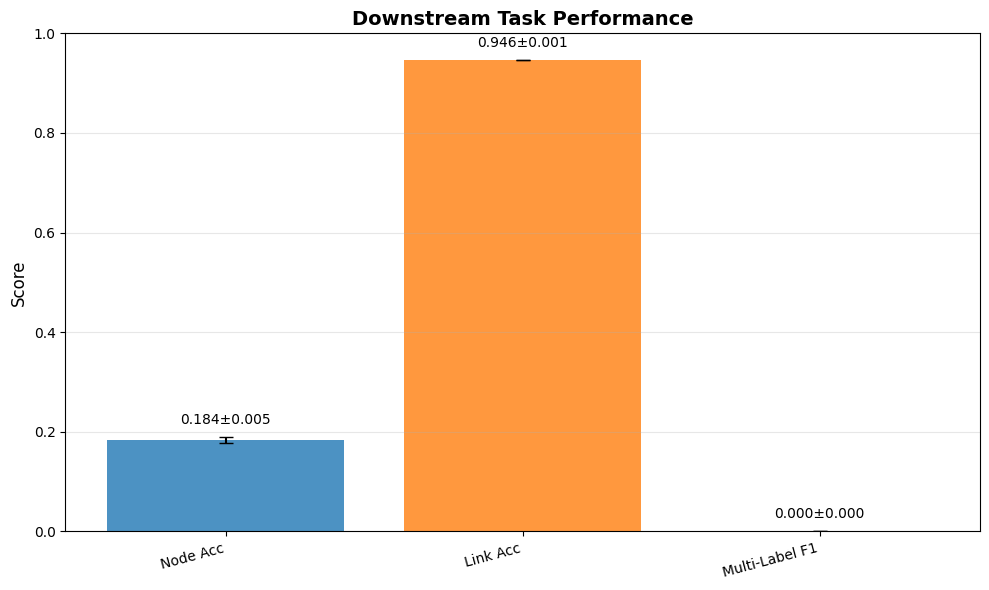

In [11]:
results_summary = {
    'node_classification': node_results,
    'binary_link_prediction': link_results,
    'multiclass_link_prediction': multiclass_results
}

torch.save(results_summary, results_dir / "downstream_summary.pt")
print(f"\nResults saved to: {results_dir / 'downstream_summary.pt'}")

metrics = [
    'Node Acc',
    'Link Acc',
    'Multi-Label F1'
]
values = [
    node_results['test_acc_mean'],
    link_results['test_acc_mean'],
    multiclass_results['test_f1_mean']
]
errors = [
    node_results['test_acc_std'],
    link_results['test_acc_std'],
    multiclass_results['test_f1_std']
]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(metrics, values, yerr=errors, capsize=5, alpha=0.8, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax.set_ylabel('Score', fontsize=12)
ax.set_ylim(0, 1)
ax.set_title('Downstream Task Performance', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3, axis='y')
for i, (v, e) in enumerate(zip(values, errors)):
    ax.text(i, v + e + 0.02, f'{v:.3f}±{e:.3f}', ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()